In [1]:
from ase.build import bulk
from ase.calculators.emt import EMT
import matplotlib.pyplot as plt

from atomistics.calculators.ase import evaluate_with_ase
from atomistics.workflows.evcurve.workflow import EnergyVolumeCurveWorkflow


In [2]:
workflow = EnergyVolumeCurveWorkflow(
    structure=bulk("Al", a=4.0, cubic=True),
    num_points=11,
    fit_type='polynomial',
    fit_order=3,
    vol_range=0.05,
    axes=['x', 'y', 'z'],
    strains=None,
)

In [3]:
structure_dict = workflow.generate_structures()

In [4]:
result_dict = evaluate_with_ase(task_dict=structure_dict, ase_calculator=EMT())

In [5]:
fit_dict = workflow.analyse_structures(output_dict=result_dict)
fit_dict

{'poly_fit': array([-3.29301241e-05,  8.23205680e-03, -6.48004687e-01,  1.63668527e+01]),
 'fit_type': 'polynomial',
 'fit_order': 3,
 'volume_eq': 63.72615218844302,
 'energy_eq': -0.019521620951014285,
 'bulkmodul_eq': 39.544084907317895,
 'b_prime_eq': 2.2509394023322566,
 'least_square_error': 6.520883811317011e-11,
 'volume': [60.800000000000004,
  61.44,
  62.080000000000005,
  62.72000000000003,
  63.360000000000056,
  63.99999999999998,
  64.63999999999996,
  65.28000000000004,
  65.91999999999996,
  66.55999999999999,
  67.20000000000005],
 'energy': [-0.002126867152135503,
  -0.00899209535110046,
  -0.014118255483879238,
  -0.01753027631123949,
  -0.01926923723790175,
  -0.019385014820125335,
  -0.017931790532095704,
  -0.01496535015547451,
  -0.01054147657429283,
  -0.004714997443290514,
  0.002460783060161731]}

Text(0, 0.5, 'Energy')

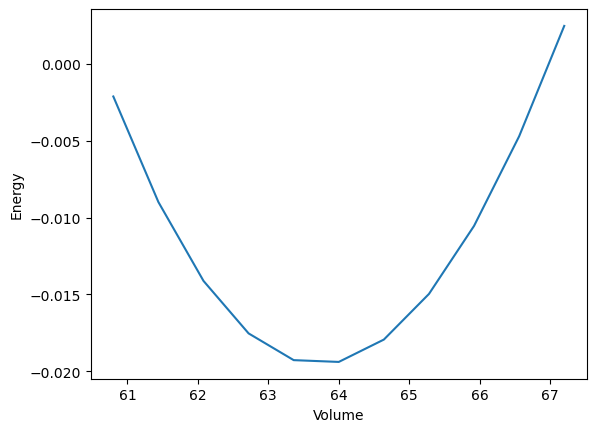

In [6]:
plt.plot(fit_dict['volume'], fit_dict['energy'])
plt.xlabel("Volume")
plt.ylabel("Energy")